29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
469/469 - 12s - 26ms/step - accuracy: 0.8219 - loss: 0.5089 - val_accuracy: 0.8761 - val_loss: 0.3351
Epoch 2/12
469/469 - 3s - 7ms/step - accuracy: 0.8826 - loss: 0.3273 - val_accuracy: 0.8989 - val_loss: 0.2734
Epoch 3/12
469/469 - 3s - 7ms/step - accuracy: 0.9000 - loss: 0.2805 - val_accuracy: 0.9085 - val_loss: 0.2517
Epoch 4/12
469/469 - 3s - 7ms/step - accuracy: 0.9113 - loss: 0.2490 - val_accuracy: 0.9153 - val_loss: 0.2372
Epoch 5/12
469/469 - 3s - 7ms/step - accuracy: 0.9180 - loss: 0.2237 - val_accuracy: 0.9162 - val_loss: 0.2296
Epoch 6/12
469/469 - 3s - 7ms/step - accuracy: 0.9241 - loss: 0.2056 - val_accuracy: 0.9226 - val_loss: 0.2183
Epoch 7/12
469/469 - 3s - 7ms/step - accuracy: 0.9307 - loss: 0.1881 - val_accuracy: 0.9212 - val_loss: 0.2242
Epoch 8/12
469/469 - 3s - 7ms/step - accuracy: 0.9341 - loss: 0.1749 - val_accuracy: 0.9266 - val_loss: 0.2165
Epoch 9/12
469/469 - 3s - 7ms/step - accuracy: 0.9408 - loss: 0.1609 - val_accuracy: 0.9202 - val_loss: 0.2301

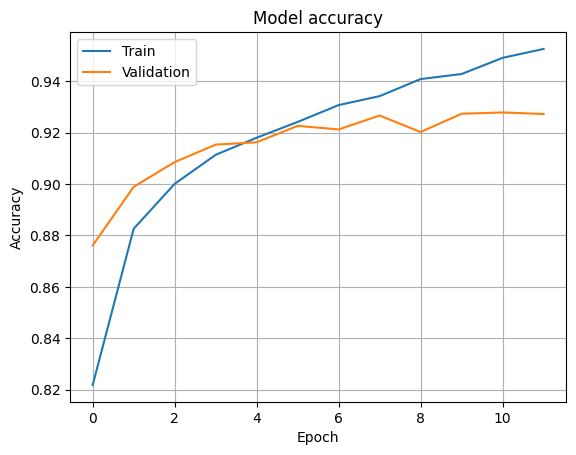

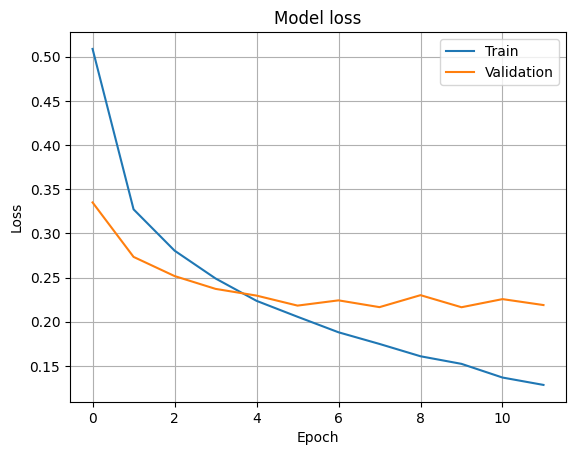

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# fashion MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# C-C-P-FC-FC 구조의 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

res=cnn.evaluate(x_test, y_test, verbose=0)
print('정확률은', res[1]*100)

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()